In [1]:
import atd2022
import torch
import pandas as pd
import numpy as np
from utils.tools import dotdict
from ETRT_Forecaster_Wrapper import ETRT_Forecaster
# pd.set_option('display.max_columns', None)
from sktime.performance_metrics.forecasting import (
    MeanAbsoluteScaledError,
    MeanSquaredError,
)
import holoviews as hv
hv.extension("bokeh")

ModuleNotFoundError: No module named 'driver.ATD_ETRT_CNN'

In [ ]:
import torch
torch.cuda.is_available()

In [3]:
torch.cuda.set_device(2) 

# Testing ATD Protocol

In [4]:
truth = atd2022.io.read_csv()

In [5]:
args = dotdict()

#args.dim = 1024
args.if_scheduler = False
args.if_filter_constant = True
args.if_normalize = False
args.use_gpu = True
args.batch_size = 30
args.train_epochs=10
args.lr = 0.01
args.history_len =10
args.predict_len = 1

In [6]:
exp = CNN_Transformer_Forecaster(args)

In [7]:
exp.fit(truth)

Use GPU: cuda:None


/scratch/mfeng/anaconda/envs/atd2022/lib/python3.9/site-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([30, 1, 5200])) that is different to the input size (torch.Size([30, 5200])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/scratch/mfeng/anaconda/envs/atd2022/lib/python3.9/site-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([25, 1, 5200])) that is different to the input size (torch.Size([25, 5200])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


train_loss 2996.32689339774
train_loss 1006.9976043701172
train_loss 231.58239528111048
train_loss 231.5477055140904
train_loss 231.51039123535156
train_loss 231.4706573486328
train_loss 231.43053327287947
train_loss 231.3896026611328
train_loss 231.34778703962053
train_loss 231.30556161063058


In [8]:
test=exp.predict(truth.index[-4:]+4)

/scratch/mfeng/LISP-ATD-2022/Mark_Exp/Transformer+CNN/driver/atd_CNN_Transformer.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = model(torch.tensor(inputs).to(device).float(), torch.tensor(inputs_1).to(device).float()).cpu().detach().numpy()


In [9]:
test

Region                  AA                                               ...  \
Event                   01   02   03   04   05   06   07   08   09   10  ...   
2018-02-12/2018-02-18  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2018-02-19/2018-02-25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2018-02-26/2018-03-04  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2018-03-05/2018-03-11  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

Region                  ZI                                               
Event                   11   12   13   14   15   16   17   18   19   20  
2018-02-12/2018-02-18  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
2018-02-19/2018-02-25  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
2018-02-26/2018-03-04  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
2018-03-05/2018-03-11  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  

[4 rows x 5200 columns]

# Full Scale Testing

In [10]:
# args = dotdict()

# args.dim = 512
# args.use_gpu = True
# args.batch_size = 30
# args.train_epochs=600
# args.lr = 0.005
# args.history_len =50

# args.dim = 4096
# args.use_gpu = True
# args.batch_size = 30
# args.train_epochs=900
# args.lr = 0.001
# args.history_len =52

args = dotdict()

args.if_scheduler = False
args.if_filter_constant = True
args.if_normalize = False
args.use_gpu = True
args.batch_size = 30
args.train_epochs= 500
args.lr = 0.001
args.history_len = 20
args.predict_len = 4

In [11]:
lispDL = CNN_Transformer_Forecaster(args)

In [12]:
 # Load data
truth = atd2022.io.read_csv()

# Subset the data for the sake of making this fast.
# Remove if you want to run the example on the entire dataset.
truth = truth.head(108)
#truth = truth.tail(108)

# Experiment Parameters
window = 100
num_predict = 4
gap = 0
slide = 1

# Create a dataset `Splitter` object for generating train/test splits
splitter = atd2022.backtest.Splitter(
    truth,
    window,
    num_predict,
    gap,
    slide,
    expanding=True,
)

In [13]:
 # Populate a list of models that support the `atd2022.forecasters.Forecaster` protocol
# with which will we generate historical forecasts
models = [
    lispDL,
    atd2022.forecasters.PredictMeanForecaster(),
    atd2022.forecasters.ExponentiallyWeightedMovingAverage(),
]

# Compute historical forecasts for all models
predictions = [
    atd2022.backtest.historical_forecast(model, splitter, verbose=True)
    for model in models
]

<CNN_Transformer_Forecaster_Wrapper.CNN_Transformer_Forecaster object at 0x7f227523b610>:   0%|          | 0/5…

Use GPU: cuda:None
train_loss 244.28824361165366
train_loss 189.31491088867188
train_loss 167.7735137939453
train_loss 154.39825948079428
train_loss 141.28866577148438
train_loss 133.4824676513672
train_loss 127.41341145833333
train_loss 123.24207560221355
train_loss 120.56197357177734
train_loss 116.75171152750652
train_loss 114.50152079264323
train_loss 113.00816345214844
train_loss 111.41097259521484
train_loss 109.90594228108723
train_loss 109.05213419596355
train_loss 108.08893585205078
train_loss 106.39986419677734
train_loss 105.14407602945964
train_loss 103.05811309814453
train_loss 101.36428833007812
train_loss 99.1544418334961
train_loss 96.65590413411458
train_loss 94.3272476196289
train_loss 91.18478902180989
train_loss 87.75940195719402
train_loss 83.11009979248047
train_loss 77.73070017496745
train_loss 73.46557108561198
train_loss 75.8867696126302
train_loss 79.18715413411458
train_loss 73.84129842122395
train_loss 70.90099334716797
train_loss 68.9906997680664
train_loss

train_loss 35.729384104410805
train_loss 35.20414733886719
train_loss 34.979729334513344
train_loss 34.40571085611979
train_loss 34.555039723714195
train_loss 34.43827120463053
train_loss 35.11461512247721
train_loss 34.57682736714681
train_loss 34.917989095052086
train_loss 34.37389818827311
train_loss 34.59713490804037
train_loss 35.478387196858726
train_loss 34.72216288248698
train_loss 36.00505828857422
train_loss 34.86052576700846
train_loss 36.40191904703776
train_loss 35.11797332763672
train_loss 34.91003672281901
train_loss 35.01855723063151
train_loss 34.74493662516276
train_loss 34.46892547607422
train_loss 34.732428232828774
train_loss 34.51194826761881
train_loss 34.219977696736656
train_loss 34.93965148925781
train_loss 34.48542785644531
train_loss 34.65592829386393
train_loss 34.634766260782875
train_loss 34.80160268147787
train_loss 35.33447011311849
train_loss 34.91621780395508
train_loss 36.98418935139974
train_loss 34.92717488606771
train_loss 35.08367029825846
train_

/scratch/mfeng/LISP-ATD-2022/Mark_Exp/Transformer+CNN/driver/atd_CNN_Transformer.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = model(torch.tensor(inputs).to(device).float(), torch.tensor(inputs_1).to(device).float()).cpu().detach().numpy()


Use GPU: cuda:None
train_loss 238.70968627929688
train_loss 190.15777587890625
train_loss 169.86787923177084
train_loss 154.78387959798178
train_loss 142.5175526936849
train_loss 134.8960952758789
train_loss 127.77030944824219
train_loss 123.13766988118489
train_loss 119.85963185628255
train_loss 117.93525950113933
train_loss 115.60601298014323
train_loss 113.74318186442058
train_loss 112.24976348876953
train_loss 110.9965591430664
train_loss 109.6280034383138
train_loss 108.57476552327473
train_loss 107.53353627522786
train_loss 106.09700266520183
train_loss 104.24373881022136
train_loss 102.67496236165364
train_loss 100.71523030598958
train_loss 98.41959635416667
train_loss 96.22617594401042
train_loss 93.6742655436198
train_loss 90.05094146728516
train_loss 86.52577463785808
train_loss 81.98782348632812
train_loss 78.13069152832031
train_loss 78.36874389648438
train_loss 82.40758260091145
train_loss 78.05509185791016
train_loss 74.91809590657552
train_loss 72.89958190917969
train_lo

train_loss 36.394755045572914
train_loss 37.76386642456055
train_loss 36.682935078938804
train_loss 37.63636144002279
train_loss 36.4261589050293
train_loss 37.372806549072266
train_loss 35.91212844848633
train_loss 36.33818435668945
train_loss 35.96370315551758
train_loss 36.213958740234375
train_loss 36.056444803873696
train_loss 37.255968729654946
train_loss 36.325416564941406
train_loss 36.001321156819664
train_loss 36.21187082926432
train_loss 35.69960021972656
train_loss 35.76486078898112
train_loss 35.443433125813804
train_loss 35.719401041666664
train_loss 35.99131520589193
train_loss 35.300665537516274
train_loss 36.030792236328125
train_loss 35.532493591308594
train_loss 36.686275482177734
train_loss 35.867560068766274
train_loss 35.86661275227865
train_loss 35.947366078694664
train_loss 36.79688390096029
train_loss 36.655818939208984
train_loss 36.55622355143229
train_loss 35.797533671061196
train_loss 36.12445576985677
train_loss 35.412638346354164
train_loss 35.00413513183

train_loss 51.592482248942055
train_loss 50.987996419270836
train_loss 51.066168467203774
train_loss 51.001216888427734
train_loss 50.51965459187826
train_loss 50.948010762532554
train_loss 51.07960764567057
train_loss 51.001275380452476
train_loss 50.62301508585612
train_loss 51.01061757405599
train_loss 50.00672912597656
train_loss 50.291116078694664
train_loss 49.64812215169271
train_loss 49.71901194254557
train_loss 50.00281016031901
train_loss 50.629156748453774
train_loss 50.18851852416992
train_loss 50.06823221842448
train_loss 49.33735911051432
train_loss 49.417423248291016
train_loss 48.554317474365234
train_loss 49.56154759724935
train_loss 48.53208541870117
train_loss 48.66320292154948
train_loss 48.163272857666016
train_loss 48.081957499186196
train_loss 47.83683649698893
train_loss 47.18445587158203
train_loss 47.18423970540365
train_loss 46.7985471089681
train_loss 46.636329650878906
train_loss 46.34761301676432
train_loss 46.30242792765299
train_loss 46.0451405843099
tra

train_loss 34.17209243774414
train_loss 33.67211023966471
train_loss 34.2819455464681
train_loss 33.91751035054525
train_loss 33.40006637573242
train_loss 33.69857597351074
train_loss 33.47419675191244
train_loss 34.412776947021484
train_loss 33.44922637939453
train_loss 33.80751927693685
train_loss 33.332911809285484
train_loss 33.0828914642334
train_loss 32.997276306152344
train_loss 33.05456415812174
train_loss 32.8840529123942
train_loss 33.110114415486656
train_loss 33.374738693237305
train_loss 33.2931702931722
train_loss 33.75136057535807
train_loss 33.430850982666016
train_loss 34.3840217590332
train_loss 33.49699465433756
train_loss 33.71436627705892
train_loss 33.784253438313804
train_loss 32.92243194580078
train_loss 33.539110819498696
train_loss 33.42039680480957
train_loss 34.437966664632164
train_loss 33.24025090535482
train_loss 33.9855842590332
train_loss 32.89610735575358
train_loss 32.72055435180664
train_loss 32.679469426472984
train_loss 33.47453753153483
train_loss

train_loss 43.28683090209961
train_loss 43.285359700520836
train_loss 43.20919926961263
train_loss 43.076473236083984
train_loss 43.056695302327476
train_loss 43.01046625773112
train_loss 43.08861287434896
train_loss 44.18004480997721
train_loss 44.00017801920573
train_loss 43.88227971394857
train_loss 43.05867258707682
train_loss 43.87952677408854
train_loss 44.5530891418457
train_loss 44.23529307047526
train_loss 43.56735865275065
train_loss 43.70391845703125
train_loss 44.00797780354818
train_loss 43.30993779500326
train_loss 42.69836171468099
train_loss 42.566776275634766
train_loss 43.02223587036133
train_loss 42.902862548828125
train_loss 42.31381479899088
train_loss 42.117576599121094
train_loss 43.144666035970054
train_loss 42.4605598449707
train_loss 42.025438944498696
train_loss 41.91012954711914
train_loss 42.67169952392578
train_loss 42.08878072102865
train_loss 42.132947285970054
train_loss 41.85805638631185
train_loss 42.69077936808268
train_loss 42.14248275756836
train_l

train_loss 33.28206443786621
train_loss 32.82422383626302
train_loss 33.293125788370766
train_loss 32.68462880452474
train_loss 32.82388114929199
train_loss 32.366214752197266
train_loss 32.95392163594564
train_loss 32.3441473642985
train_loss 33.92974980672201
train_loss 32.77912521362305
train_loss 33.0025946299235
train_loss 32.58927472432455
train_loss 33.40154012044271
train_loss 32.872779846191406
train_loss 33.15503946940104
train_loss 32.9116465250651
train_loss 33.47748057047526
train_loss 32.909044901529946
train_loss 33.728603998819985
train_loss 32.340274810791016
train_loss 32.773725509643555
train_loss 32.24060249328613
train_loss 32.530368169148765
train_loss 32.76218859354655
train_loss 32.785081227620445
train_loss 33.25058237711588
train_loss 32.71221796671549
train_loss 32.09218533833822
train_loss 32.11840375264486
train_loss 32.63231531778971
train_loss 32.49961535135905
train_loss 32.977328618367515
train_loss 31.928805669148762
train_loss 32.230655670166016
train

train_loss 40.72958246866862
train_loss 41.164162953694664
train_loss 41.72244389851888
train_loss 41.29799143473307
train_loss 40.529641469319664
train_loss 40.55351765950521
train_loss 40.59087117513021
train_loss 40.52392069498698
train_loss 40.361776987711586
train_loss 40.39738082885742
train_loss 40.939857482910156
train_loss 40.31456629435221
train_loss 41.40724309285482
train_loss 40.29269282023112
train_loss 41.408756256103516
train_loss 40.87190373738607
train_loss 40.496072133382164
train_loss 40.57236862182617
train_loss 40.31414794921875
train_loss 40.746124267578125
train_loss 40.18738810221354
train_loss 40.77400461832682
train_loss 40.48597844441732
train_loss 40.35817082722982
train_loss 39.8827158610026
train_loss 39.951925913492836
train_loss 39.6234016418457
train_loss 39.798301696777344
train_loss 39.128771464029946
train_loss 39.236307779947914
train_loss 38.744772593180336
train_loss 38.864444732666016
train_loss 38.52899424235026
train_loss 38.66918055216471
tra

train_loss 32.8803342183431
train_loss 32.54756736755371
train_loss 32.85327339172363
train_loss 32.757765452067055
train_loss 32.99623998006185
train_loss 32.248623530069985
train_loss 33.43654568990072
train_loss 32.67842928568522
train_loss 32.34900728861491
train_loss 32.3217519124349
train_loss 32.270381927490234
train_loss 32.20135307312012
train_loss 32.36584917704264
train_loss 31.922888437906902
train_loss 32.31665802001953
train_loss 31.90486717224121
train_loss 32.264716466267906
train_loss 32.10174369812012
train_loss 32.45693906148275
train_loss 32.29082171122233
train_loss 32.2526798248291
train_loss 31.755164464314777
train_loss 32.60035387674967
train_loss 32.066222508748375
train_loss 32.41601371765137
train_loss 31.372512181599934
train_loss 31.69702974955241
train_loss 31.352737426757812
train_loss 32.44473838806152
train_loss 31.886171340942383
train_loss 32.687710444132485
train_loss 32.001425425211586
train_loss 31.997403462727863
train_loss 31.916339874267578
tra

PredictMeanForecaster():   0%|          | 0/5 [00:00<?, ?it/s]

ExponentiallyWeightedMovingAverage(span=3):   0%|          | 0/5 [00:00<?, ?it/s]

In [14]:
 # Make a mapping of model names to the model's predictions
timeseries = {repr(model): pred for model, pred in zip(models, predictions)}
atd2022.viz.plot_series_nstep_panel({"Truth": truth}, timeseries)

Row
    [0] HSpacer()
    [1] HoloViews(DynamicMap, center=True, widget_location='right')
    [2] HSpacer()
    [3] Column
        [0] VSpacer()
        [1] WidgetBox
            [0] Select(margin=(20, 20, 5, 20), name='Region', options=['Aruba', 'Antigua and Bar...], value='Aruba', width=250)
            [1] Select(margin=(0, 20, 5, 20), name='Event', options=['MAKE PUBLIC STATEMENT', ...], value='MAKE PUBLIC STATEMENT', width=250)
            [2] DiscreteSlider(formatter='%d', margin=(5, 20, 20, 20), name='Step', options=OrderedDict([('0', ...]), value=0, width=250)
        [2] VSpacer()

Predictions Processed:   0%|          | 0/3 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/12 [00:00<?, ?it/s]

,MeanAbsoluteScaledError,MeanSquaredError
<CNN_Transformer_Forecaster_Wrapper.CNN_Transformer_Forecaster object at 0x7f227523b610>,1.627790,83.802935
PredictMeanForecaster(),1.459343,74.146892
ExponentiallyWeightedMovingAverage(span=3),1.591927,81.234780


MeanAbsoluteScaledError  \
model                                              n                            
<CNN_Transformer_Forecaster_Wrapper.CNN_Transfo... 0                 1.397808   
                                                   1                 1.603972   
                                                   2                 1.703739   
                                                   3                 1.805642   
ExponentiallyWeightedMovingAverage(span=3)         0                 1.210449   
                                                   1                 1.607165   
                                                   2                 1.743103   
                                                   3                 1.806993   
PredictMeanForecaster()                            0                 1.438947   
                                                   1                 1.432186   
                                                   2                 1.446583   
                                                   3                 1.519656   

                                                      MeanSquaredError  
model                                              n                    
<CNN_Transformer_Forecaster_Wrapper.CNN_Transfo... 0         70.863027  
                                                   1         83.250926  
                                                   2         85.549044  
                                                   3         88.219743  
ExponentiallyWeightedMovingAverage(span=3)         0         59.782868  
                                                   1         79.974515  
                                                   2         86.659919  
                                                   3         89.252260  
PredictMeanForecaster()                            0         69.110252  
                                                   1         71.046277  
                                                   2         71.629932  
                                                   3         74.645810

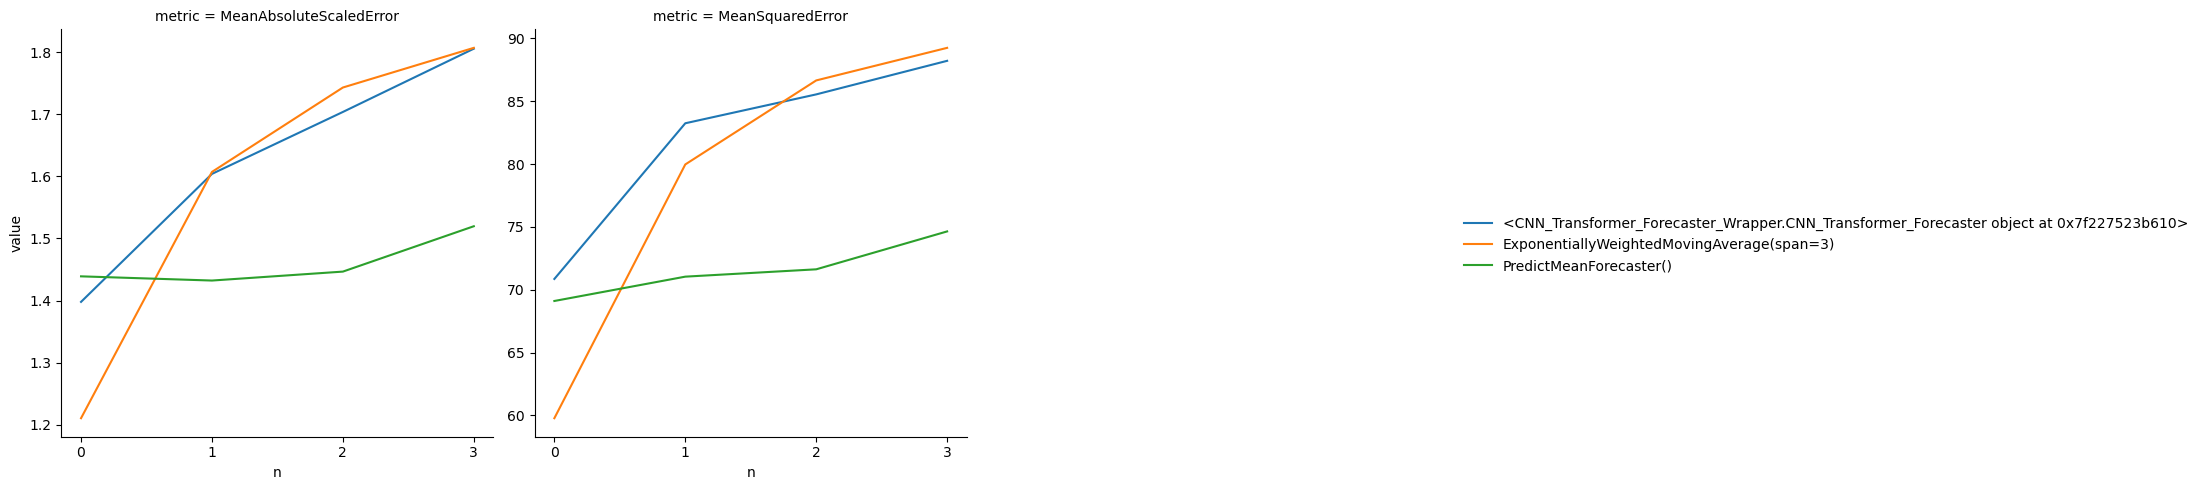

In [15]:
metric_functions = [
    MeanAbsoluteScaledError(),
    MeanSquaredError(square_root=True),
]

metrics_df = atd2022.metrics.compute_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)

metrics_n = atd2022.metrics.compute_nstep_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)
display(metrics_df)
display(metrics_n)
display(atd2022.viz.plot_nstep_metrics(metrics_n))

Predictions Processed:   0%|          | 0/3 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/12 [00:00<?, ?it/s]

,MeanAbsoluteScaledError,MeanSquaredError
<CNN_Transformer_Forecaster_Wrapper.CNN_Transformer_Forecaster object at 0x7f227523b610>,1.627790,83.802935
PredictMeanForecaster(),1.459343,74.146892
ExponentiallyWeightedMovingAverage(span=3),1.591927,81.234780


MeanAbsoluteScaledError  \
model                                              n                            
<CNN_Transformer_Forecaster_Wrapper.CNN_Transfo... 0                 1.397808   
                                                   1                 1.603972   
                                                   2                 1.703739   
                                                   3                 1.805642   
ExponentiallyWeightedMovingAverage(span=3)         0                 1.210449   
                                                   1                 1.607165   
                                                   2                 1.743103   
                                                   3                 1.806993   
PredictMeanForecaster()                            0                 1.438947   
                                                   1                 1.432186   
                                                   2                 1.446583   
                                                   3                 1.519656   

                                                      MeanSquaredError  
model                                              n                    
<CNN_Transformer_Forecaster_Wrapper.CNN_Transfo... 0         70.863027  
                                                   1         83.250926  
                                                   2         85.549044  
                                                   3         88.219743  
ExponentiallyWeightedMovingAverage(span=3)         0         59.782868  
                                                   1         79.974515  
                                                   2         86.659919  
                                                   3         89.252260  
PredictMeanForecaster()                            0         69.110252  
                                                   1         71.046277  
                                                   2         71.629932  
                                                   3         74.645810

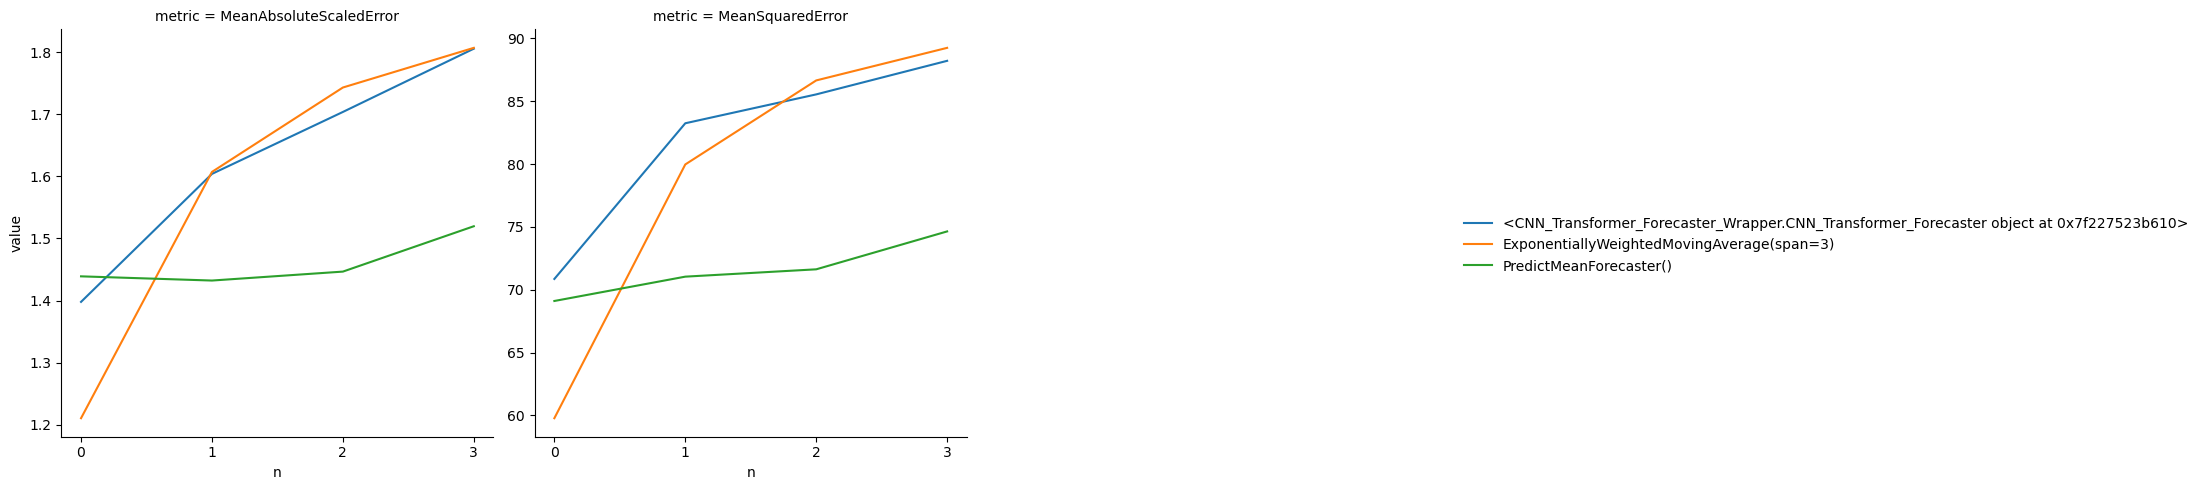

In [16]:
# args.dim = 4096
# args.use_gpu = True
# args.batch_size = 30
# args.train_epochs=950
# args.lr = 0.001
# args.history_len =35
# Vanila CNN

metric_functions = [
    MeanAbsoluteScaledError(),
    MeanSquaredError(square_root=True),
]

metrics_df = atd2022.metrics.compute_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)

metrics_n = atd2022.metrics.compute_nstep_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)
display(metrics_df)
display(metrics_n)
display(atd2022.viz.plot_nstep_metrics(metrics_n))